In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/DATASETS/Wine_clust .csv')

In [4]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


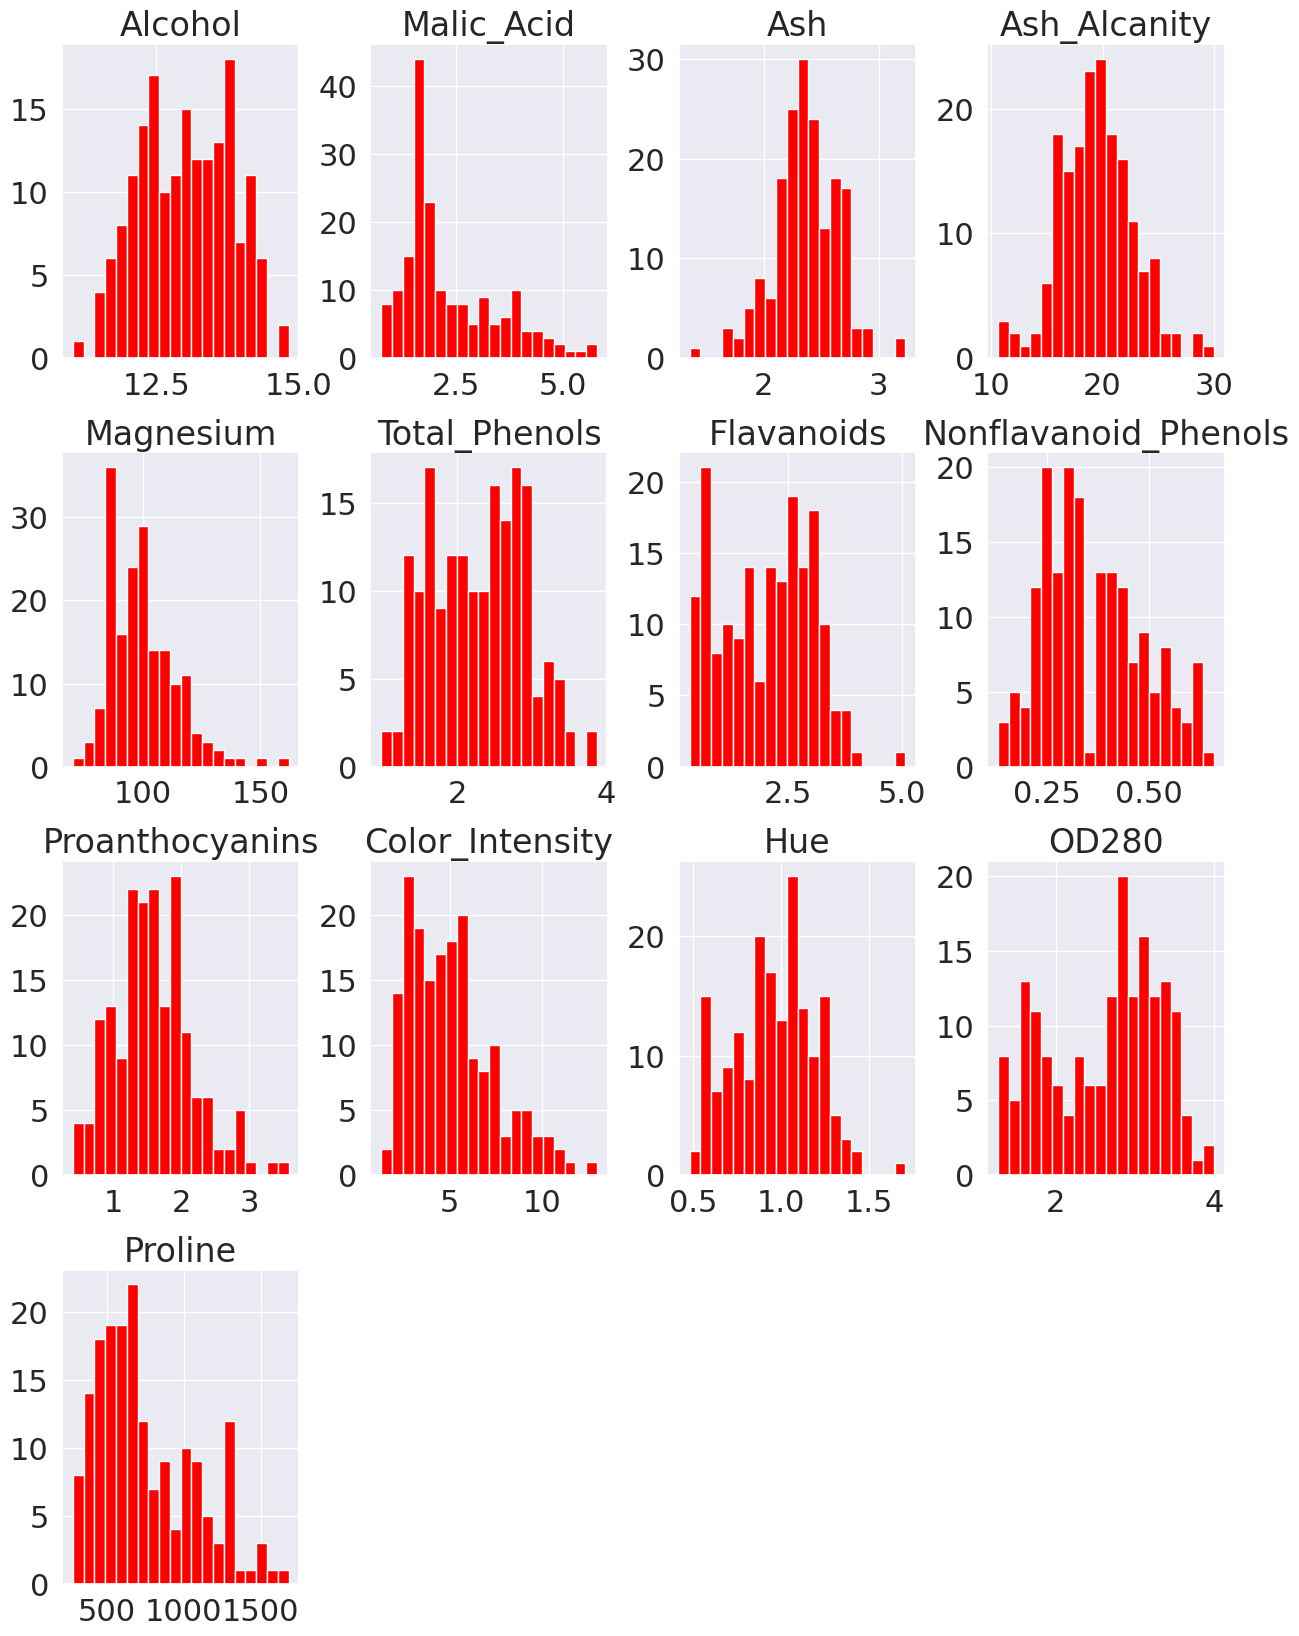

In [7]:
sns.set(style='darkgrid',font_scale=2, rc={'figure.figsize':(15,20)})
ax=data.hist(bins=20,color='red' )

In [8]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [10]:
data.skew()
# using data.skew(), we can further determine the distribution of data for each feature.
# A feature with a skew of 0 would represent data that has perfectly balanced distribution
# Features with skews greater than 0 have a higher distribution of data towards the left
# and features with skews less than 0 have a higher distribution towards the right.

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

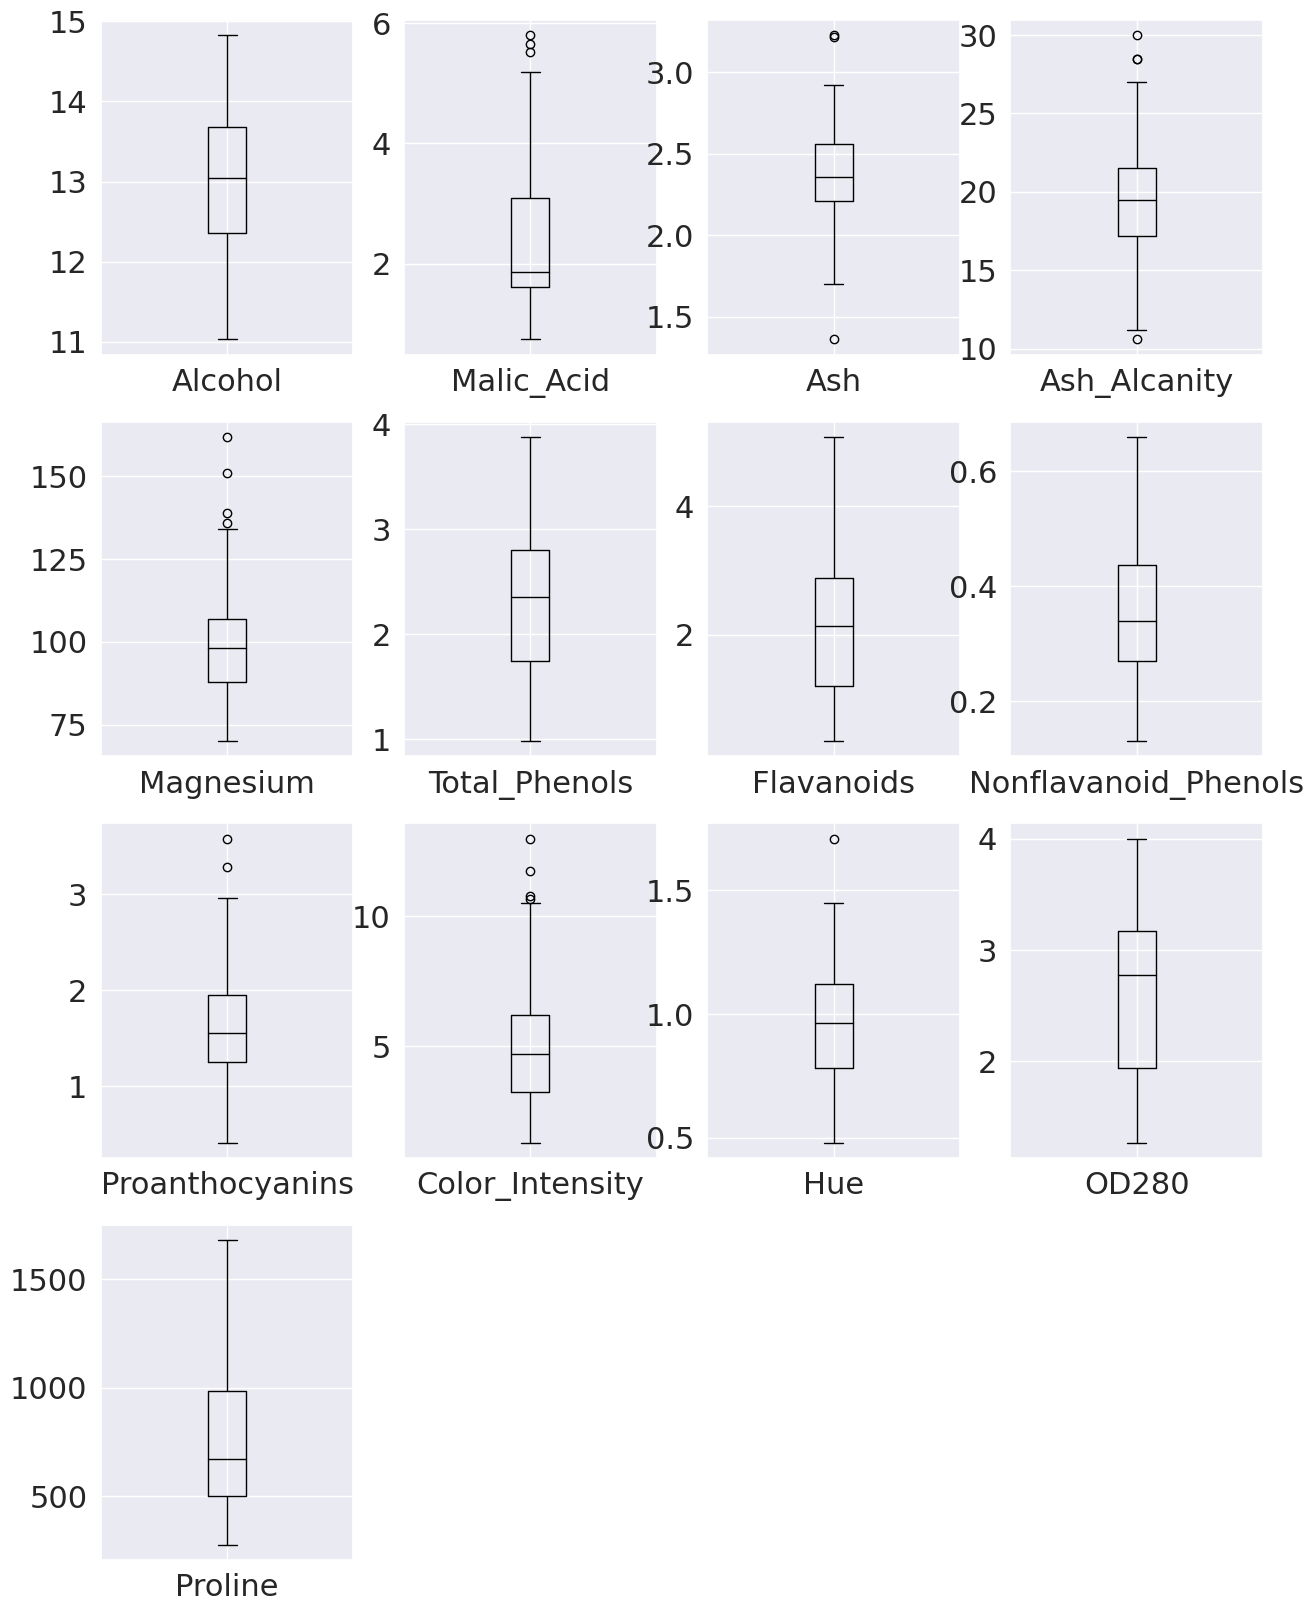

In [11]:
data.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

<Axes: >

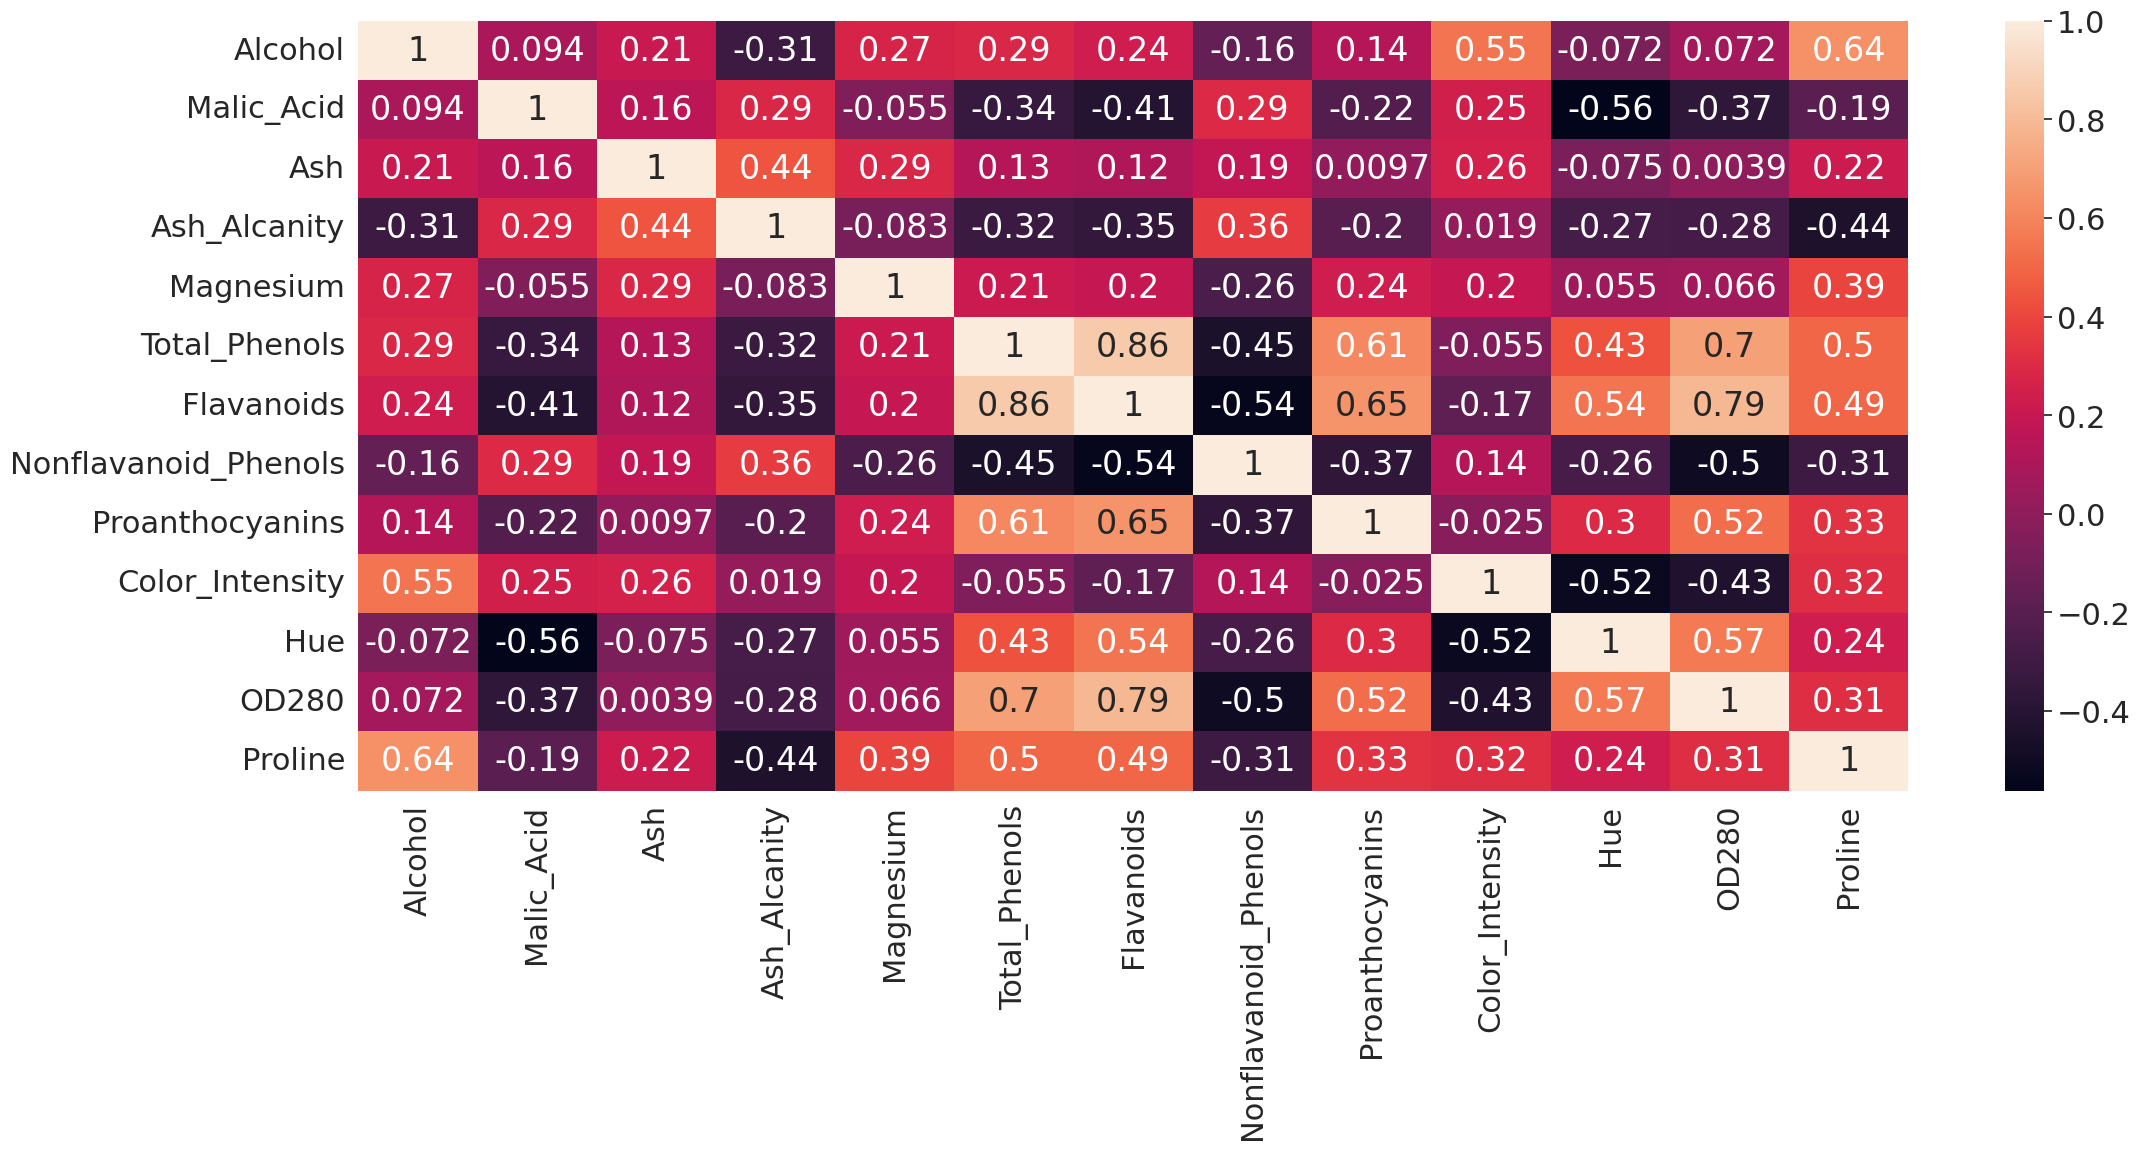

In [12]:
plt.figure(figsize=(25, 10))
sns.heatmap(data.corr(),annot=True)

In [13]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [14]:
print('Original shape: ', data_scaled.shape)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)
pca_data = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
print('Shape after PCA: ', pca_data.shape)
#print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Original shape:  (178, 13)
Shape after PCA:  (178, 2)


Text(0.5, 1.0, 'PCA Plot')

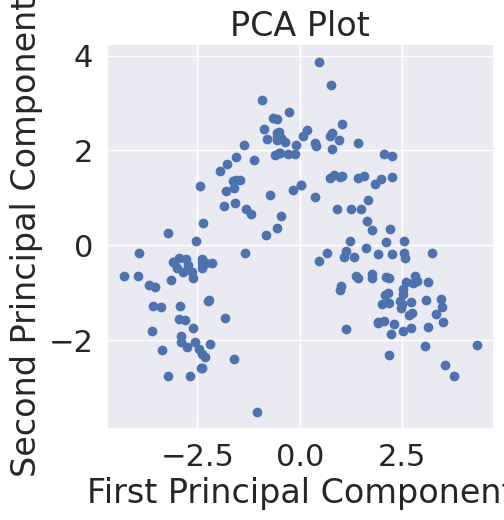

In [19]:
plt.figure(figsize=(5, 5))
plt.scatter(pca_data.iloc[:,0],pca_data.iloc[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Plot')

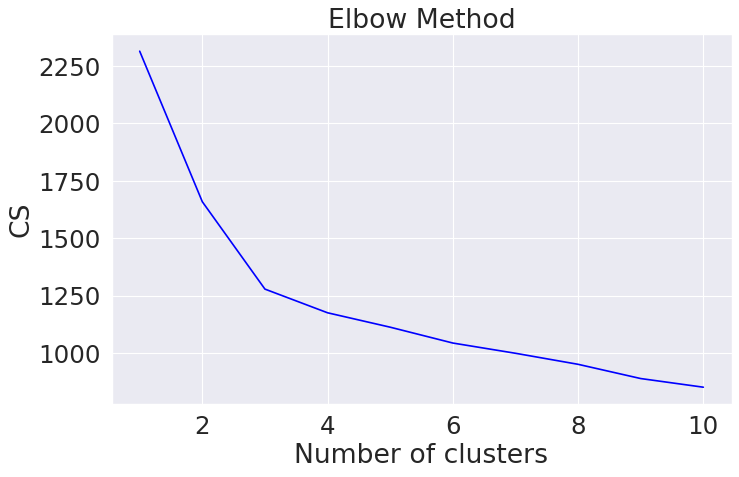

In [20]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_scaled)
    cs.append(kmeans.inertia_)

plt.figure(figsize=(10, 6), dpi=80)
plt.plot(range(1, 11), cs, color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

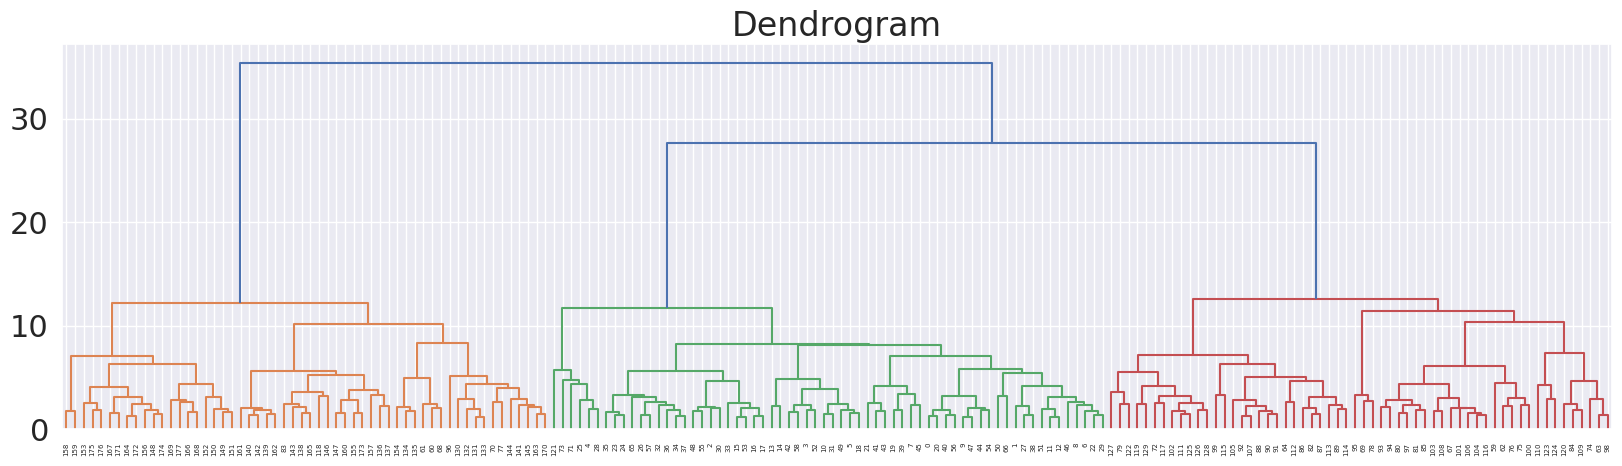

In [21]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot
pyplot.figure(figsize=(20, 5))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method = 'ward'))
plt.title('Dendrogram')
plt.show()

In [22]:
kmeans = KMeans(n_clusters = 3, n_init = 15, max_iter = 500, random_state = 42)
clusters = kmeans.fit_predict(data_scaled)

In [23]:
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'Principal Component 2')

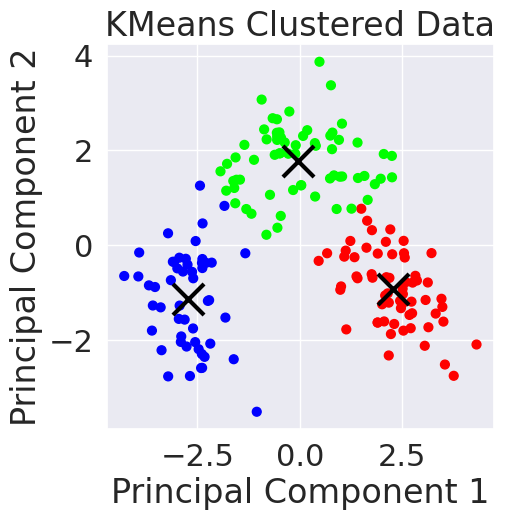

In [25]:
plt.figure(figsize=(5,5))
plt.scatter(pca_data.iloc[:,0], pca_data.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")
plt.title('KMeans Clustered Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [26]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=15, max_iter=500, random_state=0)
    clusters = kmeans.fit_predict(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, clusters))

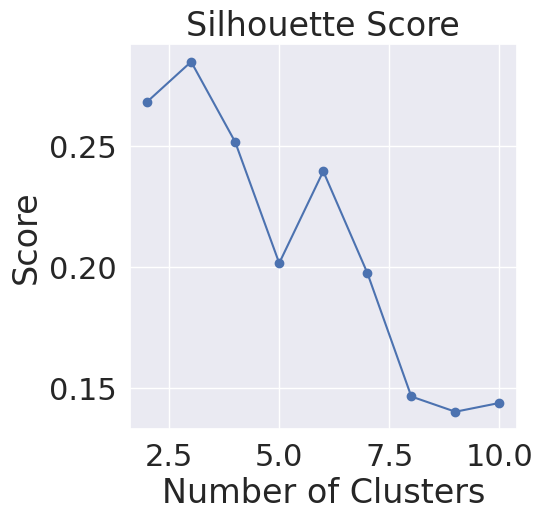

In [28]:
plt.figure(figsize=(5,5))
plt.plot(range(2, 11), silhouette_scores,marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [30]:
dbscan = DBSCAN(eps=3 ,min_samples=2)
dbscan.fit(data_scaled)
clusters = dbscan.labels_
n_clusters=len(set(clusters))
n_noise= list(clusters).count(-1)

print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)

Estimated number of clusters: 4
Estimated number of noise points: 5


In [31]:
unique, counts = np.unique(clusters, return_counts=True)
np.asarray((unique, counts)).T

array([[ -1,   5],
       [  0, 168],
       [  1,   3],
       [  2,   2]])

In [32]:
sil_avg = silhouette_score(data_scaled, clusters)
sil_avg

0.1342575010132213